<a href="https://colab.research.google.com/github/sashini472/Datathon-2/blob/main/Datathon_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Datathon 3**

### **Data cleaning and Preprocessing**

Importing the Data

In [ ]:
# Import libraries
from google.colab import files
import os
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, auc
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
import warnings
from sklearn.datasets import load_iris
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

In [ ]:
#Import data
imported=files.upload()
df= pd.read_excel('Diabetes.xlsx')

Saving Diabetes.xlsx to Diabetes.xlsx


Data Exploration

In [ ]:
df.head(10)


Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           65  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1           62  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2           63  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3           51  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4           40  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   
5           60  130.0 2013-12-09  67.751227 2013-10-23  2.20 2013-11-04  1.38   
6           41  129.0 2014-06-23  37.471938 2014-06-23  2.60 2014-06-14  1.02   
7           70  150.0 2014-08-13  25.500000 2014-09-15  2.05 2014-07-30  1.09   
8           70  123.0 2014-10-01  33.000000 2015-01-16  2.08 2014-08-06  1.56   
9           54  104.0 2015-06-11  25.333598 2015-06-11  3.07 2015-06-17  1.43   

    HDL_Date  A1c  ... leastO(A1c_Date)  leastO(DM_OnsetDate)  \
0 2013-06-14  5.4  ...              NaN                   NaN   
1 2014-05-28  5.8  ...              NaN                   NaN   
2        NaT  6.1  ...              NaN                   NaN   
3 2014-01-14  6.0  ...              NaN                   NaN   
4 2015-06-24  5.8  ...              NaN                   NaN   
5 2013-11-04  6.1  ...              NaN                   NaN   
6 2014-06-14  5.5  ...              NaN                   NaN   
7 2014-07-30  5.8  ...              NaN                   NaN   
8 2014-08-06  5.4  ...              NaN                   NaN   
9 2015-06-17  5.6  ...              NaN                   NaN   

  leastO(FBS_Date)  LeastOfAll A1C_BEF_DM  FBS_BEF_DM        Patient_ID  \
0              NaN         NaN        NaN         NaN  4001000000255903   
1              NaN         NaN        NaN         NaN  4001000000256456   
2              NaN         NaN        NaN         NaN  1001000000000054   
3              NaN         NaN        NaN         NaN  4001000000259496   
4              NaN         NaN        NaN         NaN  4001000000262094   
5              NaN         NaN        NaN         NaN  4001000000256753   
6              NaN         NaN        NaN         NaN  4001000000258794   
7              NaN         NaN        NaN         NaN  4001000000260906   
8              NaN         NaN        NaN         NaN  4001000000281214   
9              NaN         NaN        NaN         NaN  4001000000260726   

  DM_Onset_Revised  DM_Onset_Revised_1YrPrior DIABETES  
0              NaT                        NaT       No  
1              NaT                        NaT       No  
2              NaT                        NaT       No  
3              NaT                        NaT       No  
4              NaT                        NaT       No  
5              NaT                        NaT       No  
6              NaT                        NaT       No  
7              NaT                        NaT       No  
8              NaT                        NaT       No  
9              NaT                        NaT       No  

[10 rows x 43 columns]

In [ ]:
#Missing values
print(df.isnull().sum())

#Descriptive statstics
print(df.describe())

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

In [ ]:
#Binary counts
binary_counts = ['Diabetes','Depression','HTN','OA','COPD','Sex']
for column in binary_counts:
    print(df[column].value_counts())

1    5139
0    4861
Name: Diabetes, dtype: int64
0    7878
1    2122
Name: Depression, dtype: int64
1    6424
0    3576
Name: HTN, dtype: int64
0    6844
1    3156
Name: OA, dtype: int64
0    9014
1     986
Name: COPD, dtype: int64
Female    5336
Male      4664
Name: Sex, dtype: int64


Preprocessing

In [ ]:
# Replace categorical values with numerical equivalents
df['Sex'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

In [ ]:
#dropping varibales
df.drop(['DIABETES','Hypertension_Medications','Corticosteroids','sBP_Date','BMI_Date','LDL_Date','HDL_Date','A1c_Date','TG_Date','FBS_Date','FBS>DM','Total_Cholesterol_Lab_Date','DM_OnsetDate','Depression_OnsetDate','HTN_OnsetDate','OA_OnsetDate','COPD_Date','Hypertension_Medications_First_Instance','Corticosteroids_first_instance','leastO(A1c_Date)','leastO(DM_OnsetDate)','leastO(FBS_Date)','LeastOfAll','A1C_BEF_DM','FBS_BEF_DM','DM_Onset_Revised','DM_Onset_Revised_1YrPrior'], axis=1, inplace=True)


In [ ]:
#merging the rows with the same patient IDs
df = df.groupby('Patient_ID').agg('mean').reset_index()


In [ ]:
#dropping Patient ID
df = df.drop('Patient_ID', axis=1)

In [ ]:
# Calculate the percentage missing values
percentage_missing_columns = (df.isnull().sum() / len(df)) * 100

print(percentage_missing_columns)


Age_at_Exam          0.000000
sBP                  0.046501
BMI                  0.000000
LDL                  0.558010
HDL                  0.767263
A1c                  0.000000
TG                   0.558010
FBS                  0.000000
Total_Cholesterol    2.162288
Diabetes             0.000000
Depression           0.000000
HTN                  0.000000
OA                   0.000000
COPD                 0.000000
Sex                  0.000000
dtype: float64


Visualization

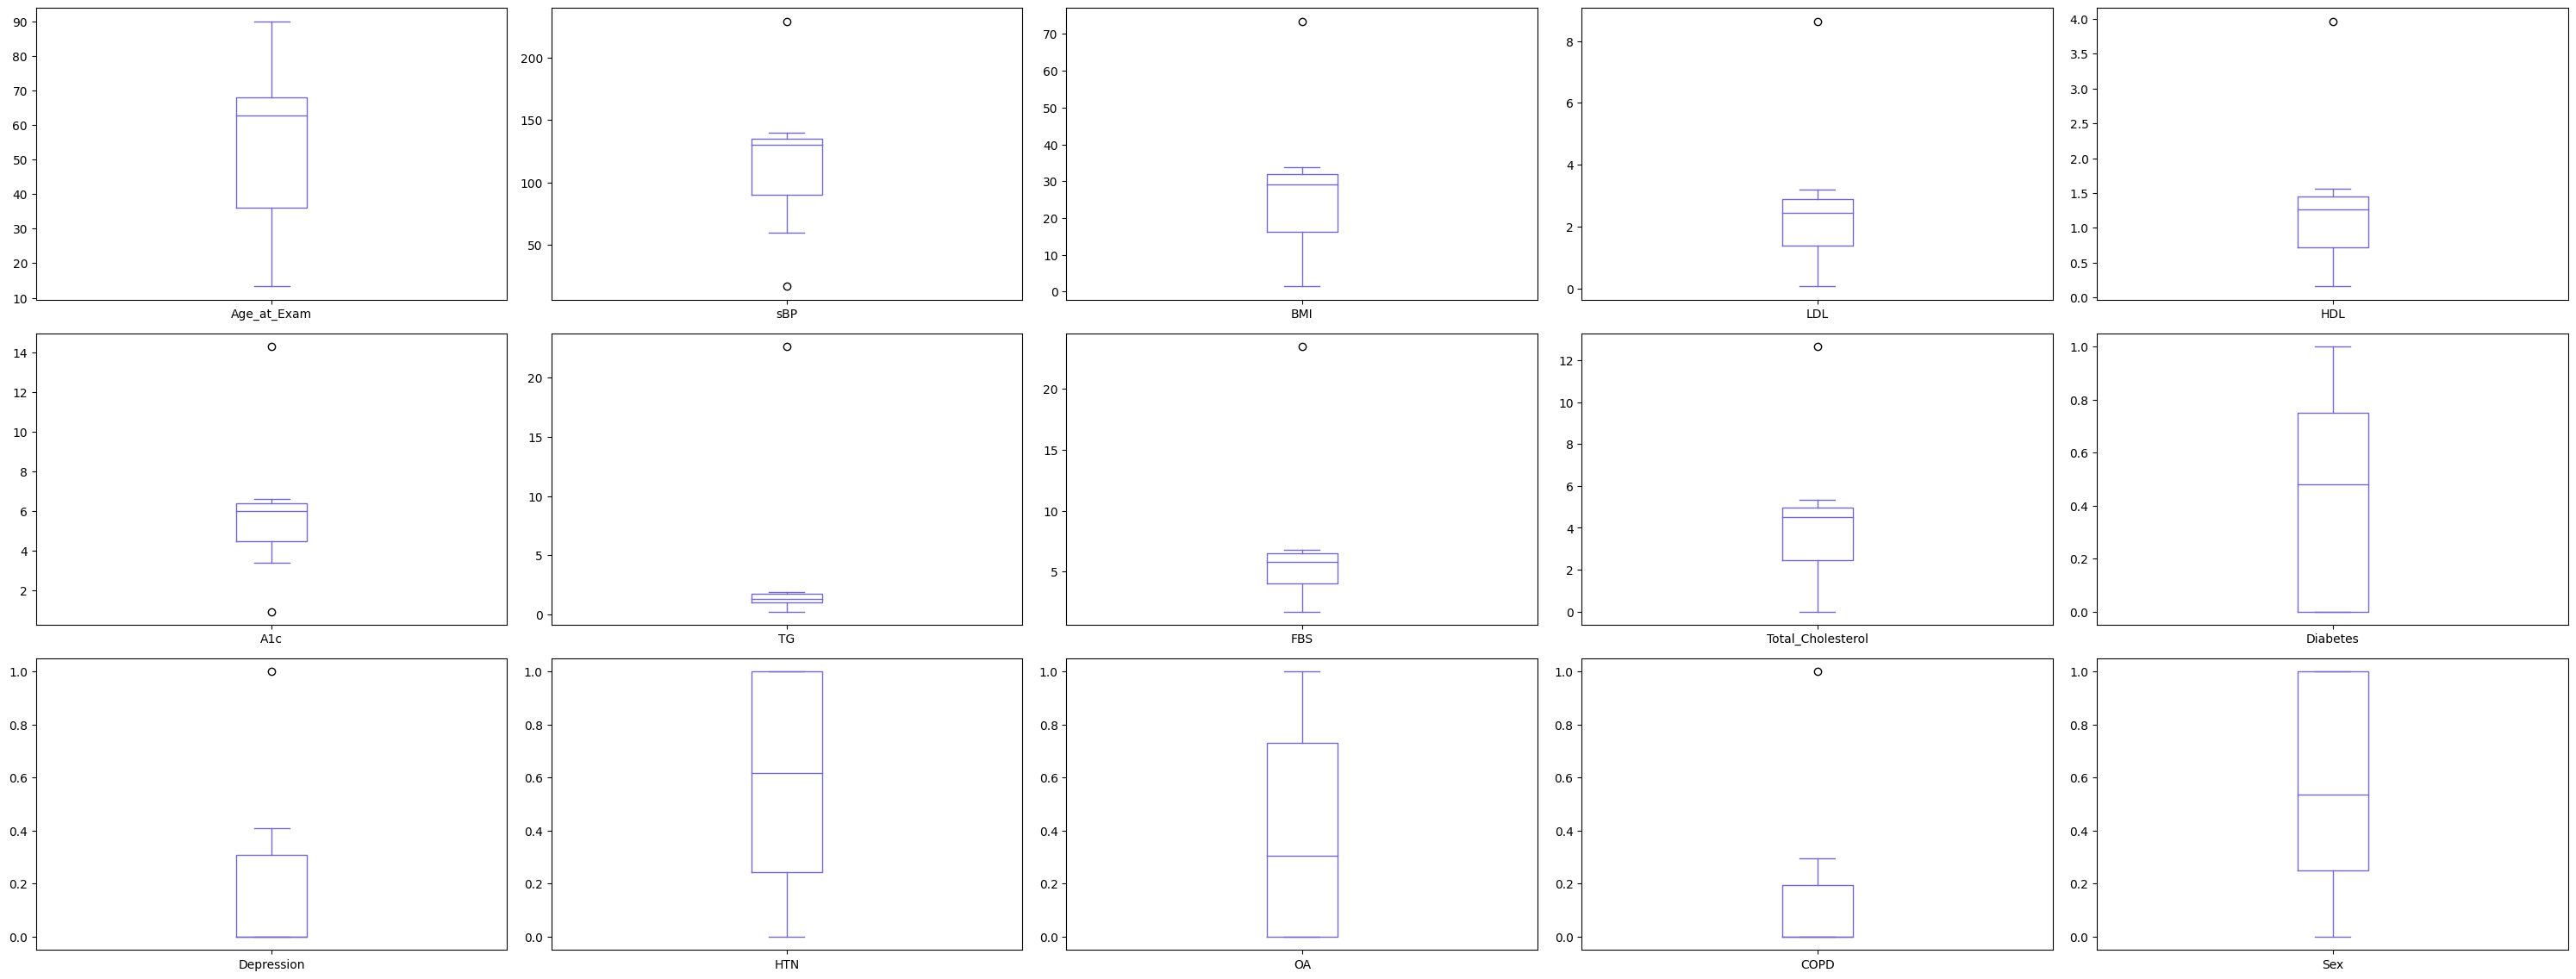

In [ ]:
#Box plot visualisation
description=df.describe()

description = description.drop('count')
description.plot(kind='box', subplots=True, layout=(4, 5), figsize=(30, 15), color='#7569c9')
plt.tight_layout()
plt.show()

<Axes: >

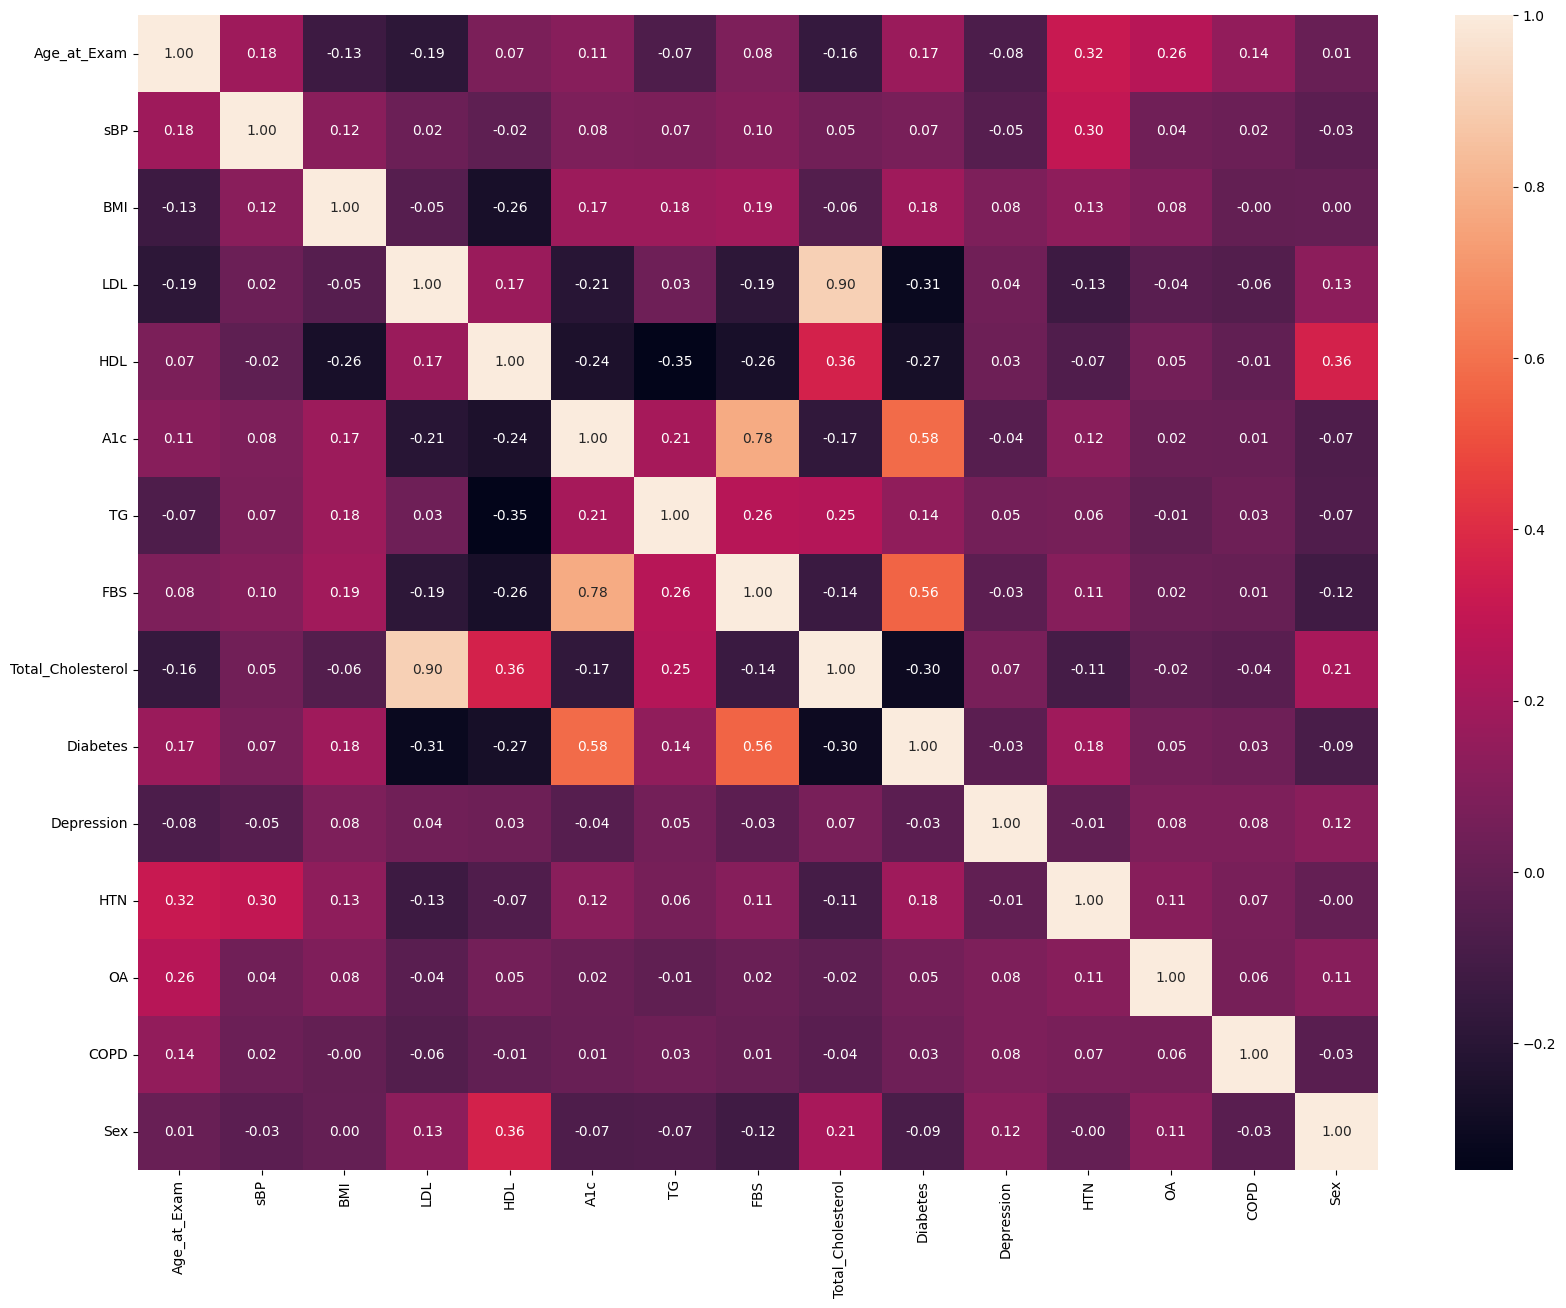

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

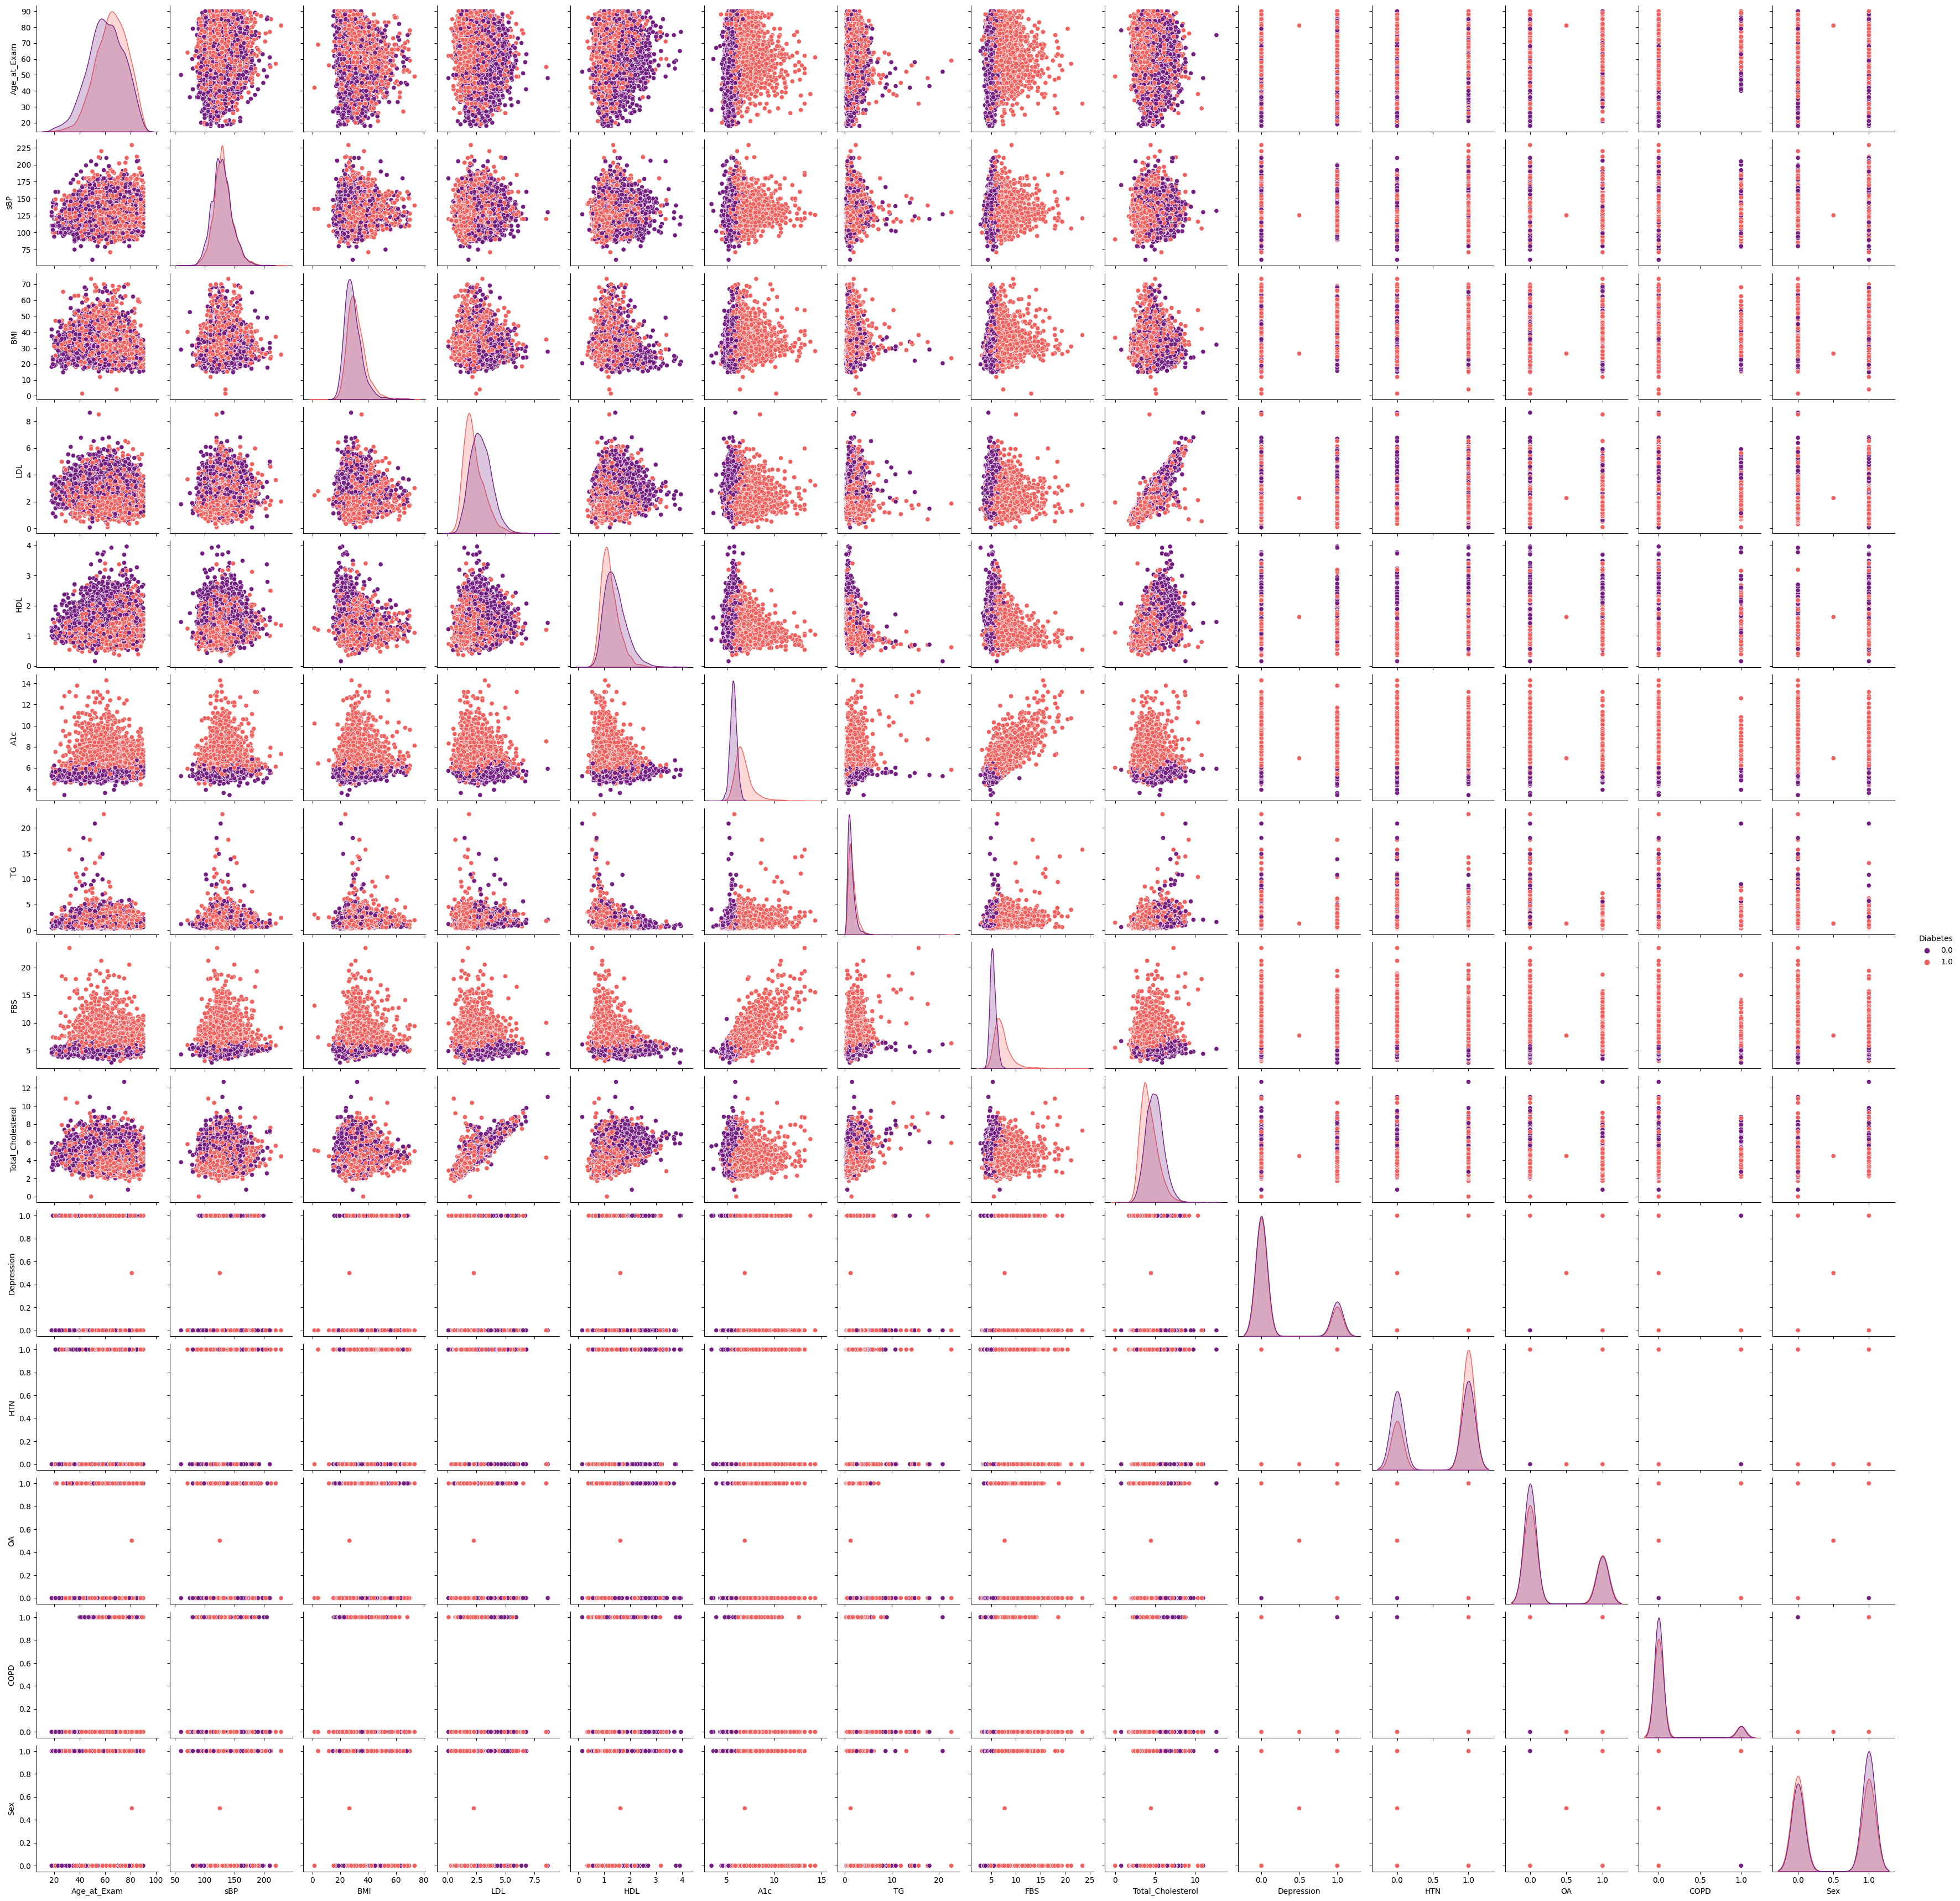

In [ ]:
#Pair plot
sns.pairplot(df, hue='Diabetes', palette="magma")
plt.show()

Imbalnce and missing values

In [ ]:
#Check for imbalance
import plotly.express as px

counts = df['Diabetes'].value_counts()

colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,
    title='Distribution of Classes in "Diabetes"',
    color_discrete_sequence=colors
)

fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Diabetes'
    ),
    title=dict(
        text='Distribution of Classes in "Diabetes"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

Dataset is not imbalanced

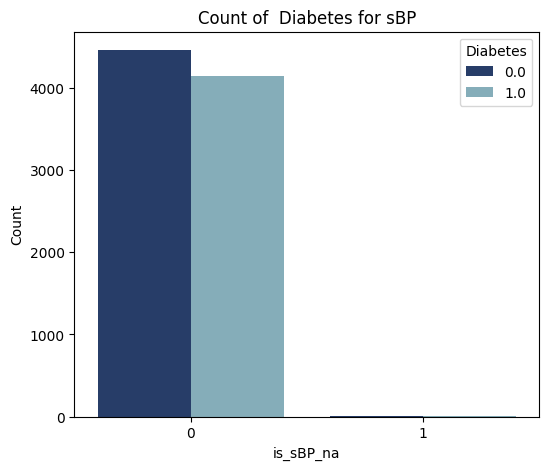

is_sBP_na
0    8598
1       4
Name: Diabetes, dtype: int64


In [ ]:
#Missing diabetes values by sBP
df['is_sBP_na'] = df['sBP'].isna().astype(int)

df['Diabetes'] = df['Diabetes'].astype(str)

colors = ['#1c3a73', '#7cb1c2']

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='is_sBP_na', hue='Diabetes', palette=colors)

plt.xlabel('is_sBP_na')
plt.ylabel('Count')
plt.title('Count of  Diabetes for sBP')
plt.legend(title='Diabetes')
plt.show()

df['Diabetes'] = df['Diabetes'].astype(float)

print(df.groupby('is_sBP_na')['Diabetes'].count())

df.drop('is_sBP_na', axis=1, inplace=True)

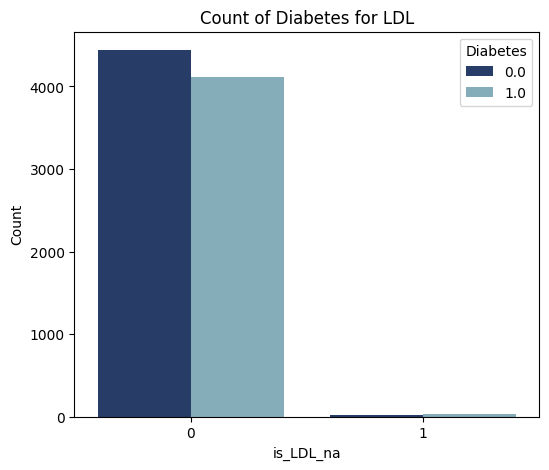

is_LDL_na
0    8554
1      48
Name: Diabetes, dtype: int64


In [ ]:
#Missing diabetes values by LDL
df['is_LDL_na'] = df['LDL'].isna().astype(int)

df['Diabetes'] = df['Diabetes'].astype(str)

colors = ['#1c3a73', '#7cb1c2']

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='is_LDL_na', hue='Diabetes', palette=colors)

plt.xlabel('is_LDL_na')
plt.ylabel('Count')
plt.title('Count of Diabetes for LDL')
plt.legend(title='Diabetes')
plt.show()

df['Diabetes'] = df['Diabetes'].astype(float)

print(df.groupby('is_LDL_na')['Diabetes'].count())

df = df.drop('is_LDL_na', axis=1)

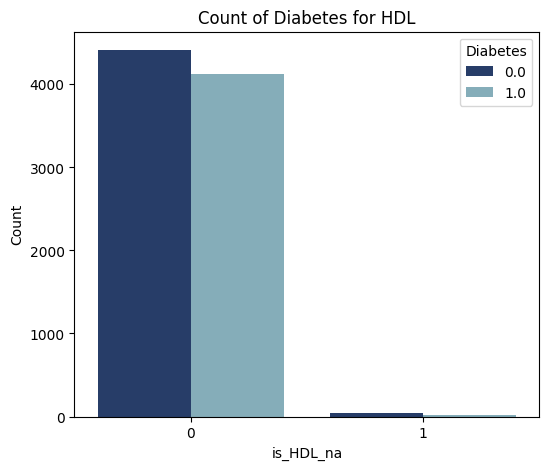

is_HDL_na
0    8536
1      66
Name: Diabetes, dtype: int64


In [ ]:
#Missing diabetes values by HDL
df['is_HDL_na'] = df['HDL'].isna().astype(int)

df['Diabetes'] = df['Diabetes'].astype(str)

colors = ['#1c3a73', '#7cb1c2']

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='is_HDL_na', hue='Diabetes', palette=colors)

plt.xlabel('is_HDL_na')
plt.ylabel('Count')
plt.title('Count of Diabetes for HDL')
plt.legend(title='Diabetes')
plt.show()

df['Diabetes'] = df['Diabetes'].astype(float)

print(df.groupby('is_HDL_na')['Diabetes'].count())

df = df.drop('is_HDL_na', axis=1)

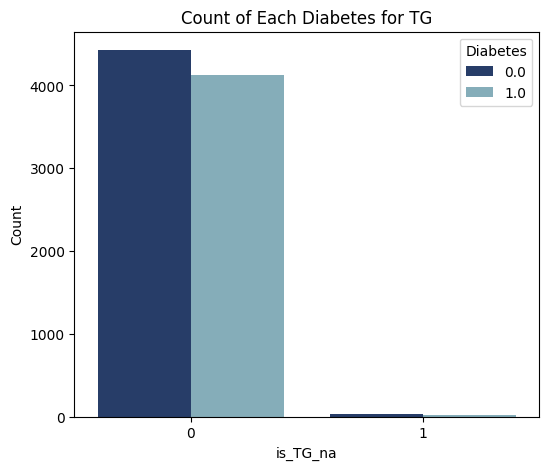

is_TG_na
0    8554
1      48
Name: Diabetes, dtype: int64


In [ ]:
#Missing diabetes values by TG
df['is_TG_na'] = df['TG'].isna().astype(int)

df['Diabetes'] = df['Diabetes'].astype(str)

colors = ['#1c3a73', '#7cb1c2']

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='is_TG_na', hue='Diabetes', palette=colors)

plt.xlabel('is_TG_na')
plt.ylabel('Count')
plt.title('Count of Each Diabetes for TG')
plt.legend(title='Diabetes')
plt.show()

df['Diabetes'] = df['Diabetes'].astype(float)

print(df.groupby('is_TG_na')['Diabetes'].count())

df = df.drop('is_TG_na', axis=1)

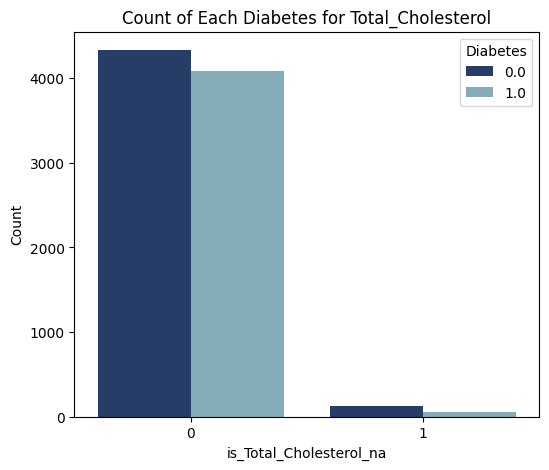

is_Total_Cholesterol_na
0    8416
1     186
Name: Diabetes, dtype: int64


In [ ]:
#Missing diabetes values by total cholesterol
df['is_Total_Cholesterol_na'] = df['Total_Cholesterol'].isna().astype(int)

df['Diabetes'] = df['Diabetes'].astype(str)

colors = ['#1c3a73', '#7cb1c2']

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='is_Total_Cholesterol_na', hue='Diabetes', palette=colors)

plt.xlabel('is_Total_Cholesterol_na')
plt.ylabel('Count')
plt.title('Count of Each Diabetes for Total_Cholesterol')
plt.legend(title='Diabetes')
plt.show()

df['Diabetes'] = df['Diabetes'].astype(float)

print(df.groupby('is_Total_Cholesterol_na')['Diabetes'].count())

df = df.drop('is_Total_Cholesterol_na', axis=1)

no evidence that the presence or absence of missing values in the dataset significantly influences the output class

## **Question 1: What is the correlation between diabetes and other medical conditions?**

Preproccessing

In [ ]:
#Drop unnessary columns
df1=df.drop(['Age_at_Exam','sBP','LDL','HDL','A1c','TG','FBS','Sex'], axis=1)
print(df1.isnull().sum())

BMI                    0
Total_Cholesterol    186
Diabetes               0
Depression             0
HTN                    0
OA                     0
COPD                   0
dtype: int64


In [ ]:
df1.head(10)

BMI  Total_Cholesterol  Diabetes  Depression  HTN   OA  COPD
0  30.900000                NaN       0.0         0.0  1.0  0.0   1.0
1  32.500000               5.96       1.0         1.0  1.0  1.0   0.0
2  33.400000               5.65       1.0         0.0  1.0  0.0   0.0
3  23.600000               3.54       0.0         1.0  1.0  1.0   0.0
4  30.677753               4.76       1.0         0.0  1.0  1.0   0.0
5  35.321237               3.37       1.0         1.0  1.0  1.0   0.0
6  34.300000               5.55       1.0         1.0  1.0  1.0   0.0
7  28.500000               3.78       1.0         1.0  1.0  0.0   1.0
8  24.900000               4.95       1.0         0.0  1.0  1.0   0.0
9  40.700000               5.12       1.0         0.0  1.0  0.0   0.0

Split training and test set

In [ ]:
#Define features and target
X1 = df1.drop('Diabetes', axis=1)
y1 = df1['Diabetes']

#Split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

K-fold cross validation

In [ ]:
total_train_acc = 0
total_validation_acc = 0

#K-fold Cross-Validation setup
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_validation_loss = 0

for train_index, valid_index in kf.split(X_train1):
    X_train_data, X_valid_data = X_train1.iloc[train_index], X_train1.iloc[valid_index]
    Y_train_data, Y_valid_data = y_train1.iloc[train_index], y_train1.iloc[valid_index]

    #Define pipeline
    model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('normalizer', StandardScaler()),
    ('classifier', LogisticRegression())
    ])

    #Fit model
    model.fit(X_train_data, Y_train_data)


    #Assess model
    y_train_pred = model.predict(X_train_data)
    train_acc = accuracy_score(Y_train_data, y_train_pred)
    total_train_acc += train_acc

    y_valid_pred = model.predict(X_valid_data)
    validation_acc = accuracy_score(Y_valid_data, y_valid_pred)
    total_validation_acc += validation_acc
total_train_acc /= k
total_validation_acc /= k

print("Average Training Accuracy:", total_train_acc)
print("Average Validation Accuracy:", total_validation_acc)

Average Training Accuracy: 0.6636752001351838
Average Validation Accuracy: 0.6589146231274594


Similarity in score indicates that the model is likely not overfit

Hyperparameter tuning: Grid Search

In [ ]:
#Define hyperparameters
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit grid search to training data
grid_search.fit(X_train1, y_train1)

# Access results
results = pd.DataFrame(grid_search.cv_results_)

results[results['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14       0.024743       0.00112         0.003036        0.000135   

   param_classifier__C param_classifier__penalty param_classifier__solver  \
14                0.01                        l1                     saga   

                                               params  split0_test_score  \
14  {'classifier__C': 0.01, 'classifier__penalty':...           0.636892   

    split1_test_score  split2_test_score  split3_test_score  \
14           0.678052           0.672238           0.677326   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
14           0.648256         0.662553        0.016824                1

best hyperparameter for the model are c=0.01, L1 and liblinear

Testing model

In [ ]:
 imputer = SimpleImputer(strategy='median')
 scaler = StandardScaler()

#Test model on test split
X_train_imputed = imputer.fit_transform(X_train1)
X_train_normalized = scaler.fit_transform(X_train_imputed)

X_test_imputed = imputer.transform(X_test1)
X_test_normalized = scaler.transform(X_test_imputed)

#fit model
log_reg = LogisticRegression(penalty ='l1', C=0.01, solver = 'liblinear')
log_reg.fit(X_train_normalized,y_train1)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

Model evaluation

In [ ]:
# Define utility functions for model evaluation

def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)
    auc = roc_auc_score(Y, Y_pred)

    return conf_matrix, class_report, auc, acc

def print_scores(conf_matrix, class_report, auc, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

======== Training Set ==========
AUC :  0.6276259221447341
Accuracy :  0.6220026158988519
Confusion Matrix:
[[1613 1939]
 [ 662 2667]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.45      0.55      3552
         1.0       0.58      0.80      0.67      3329

    accuracy                           0.62      6881
   macro avg       0.64      0.63      0.61      6881
weighted avg       0.65      0.62      0.61      6881

======== Test Set ==========
AUC :  0.6268551782434124
Accuracy :  0.6176641487507263
Confusion Matrix:
[[418 490]
 [168 645]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.46      0.56       908
         1.0       0.57      0.79      0.66       813

    accuracy                           0.62      1721
   macro avg       0.64      0.63      0.61      1721
weighted avg       0.64      0.62      0.61      1721



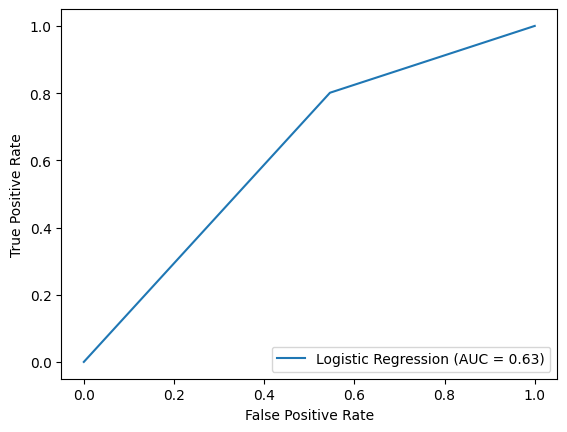

In [ ]:
#Predicting y values
y_pred_test = model.predict(X_test_normalized)
y_pred_train = model.predict(X_train_normalized)

conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_test1, y_pred_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_train1, y_pred_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_train1, y_pred_train)  # Make sure to use consistent variable names
roc_auc = auc (fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

fairly good sesitivity, traning and testing scores very similar, model not overfit

Further exploration

In [ ]:
df1.fillna(df1.median(), inplace=True)

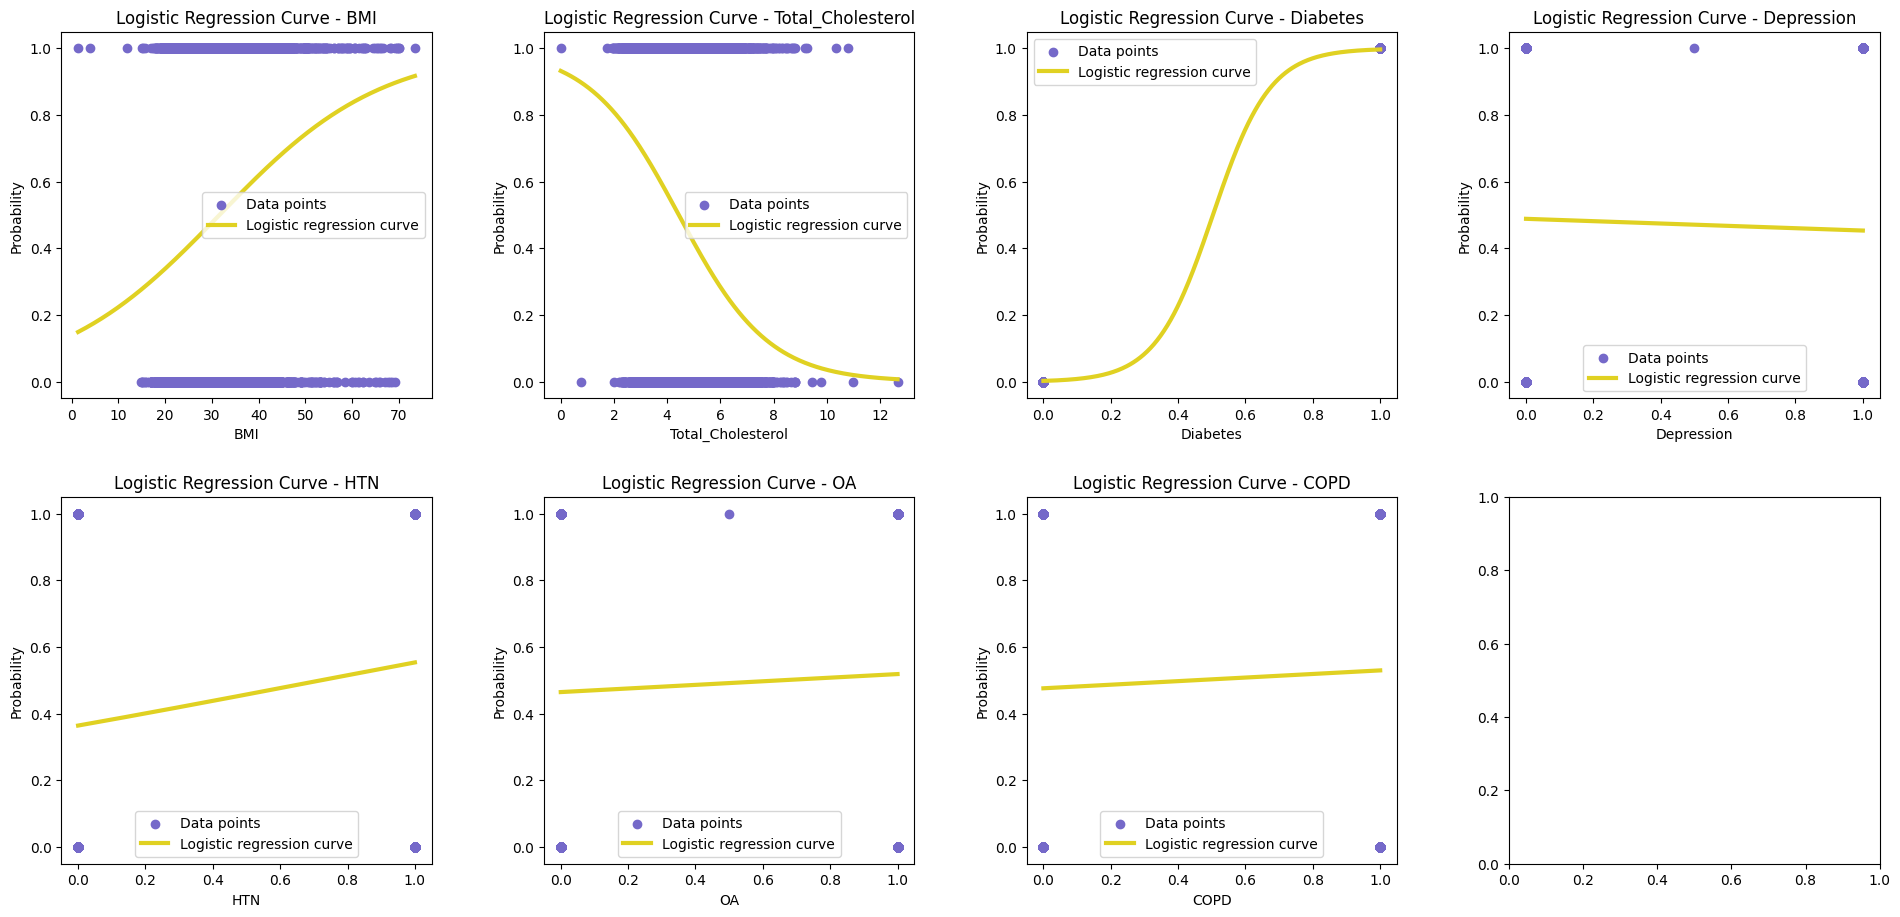

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(df1.columns[:7]):
    row = i // 4
    col = i % 4

    # Reshape the feature and outcome arrays to fit the model
    X = df1[[feature]]
    y = df1['Diabetes']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

In [ ]:
# Separate features and target variable
X = df1.drop('Diabetes', axis=1)
y = df1['Diabetes']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.619404
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                 8602
Model:                          Logit   Df Residuals:                     8595
Method:                           MLE   Df Model:                            6
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.1055
Time:                        03:54:31   Log-Likelihood:                -5328.1
converged:                       True   LL-Null:                       -5956.6
Covariance Type:            nonrobust   LLR p-value:                2.293e-268
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5456      0.152      3.584      0.000       0.247       0.844
BMI     

## **Question #2: What conditions need to be met to be diagnosed as diabetic based on lesser researched/ less used biomarkers? ex. A1C, GTT, FBS**

Data exploration/ Preprocessing

In [ ]:
df.head(10)

Age_at_Exam    sBP        BMI   LDL   HDL   A1c    TG   FBS  \
0         63.0  133.0  30.900000  1.65   NaN   6.1  0.76   5.6   
1         75.0  170.0  32.500000  3.98  1.66   6.6  2.33   7.2   
2         49.0  130.0  33.400000  3.24  1.88   6.6  1.16   7.5   
3         66.0  112.0  23.600000  1.62  1.34   5.8  1.53   6.2   
4         84.0  128.0  30.677753  2.13  1.81   7.6   NaN   5.3   
5         58.0  138.0  35.321237  1.38  0.98   6.9  2.23   6.1   
6         68.0  122.0  34.300000  3.09  1.81   5.9  1.44   5.5   
7         73.0  118.0  28.500000  1.04  0.94   5.7  1.35   6.1   
8         75.0  110.0  24.900000  3.03  1.34   6.3  1.31   9.6   
9         62.0  188.0  40.700000  2.82  1.07  13.2  2.71  19.3   

   Total_Cholesterol  Diabetes  Depression  HTN   OA  COPD  Sex  
0                NaN       0.0         0.0  1.0  0.0   1.0  0.0  
1               5.96       1.0         1.0  1.0  1.0   0.0  1.0  
2               5.65       1.0         0.0  1.0  0.0   0.0  1.0  
3               3.54       0.0         1.0  1.0  1.0   0.0  0.0  
4               4.76       1.0         0.0  1.0  1.0   0.0  1.0  
5               3.37       1.0         1.0  1.0  1.0   0.0  0.0  
6               5.55       1.0         1.0  1.0  1.0   0.0  1.0  
7               3.78       1.0         1.0  1.0  0.0   1.0  1.0  
8               4.95       1.0         0.0  1.0  1.0   0.0  0.0  
9               5.12       1.0         0.0  1.0  0.0   0.0  0.0

In [ ]:
#Drop unessary columns
df2= df.drop(['Age_at_Exam','Depression','HTN','OA','COPD','Sex'], axis=1)
df2.head(10)


sBP        BMI   LDL   HDL   A1c    TG   FBS  Total_Cholesterol  Diabetes
0  133.0  30.900000  1.65   NaN   6.1  0.76   5.6                NaN       0.0
1  170.0  32.500000  3.98  1.66   6.6  2.33   7.2               5.96       1.0
2  130.0  33.400000  3.24  1.88   6.6  1.16   7.5               5.65       1.0
3  112.0  23.600000  1.62  1.34   5.8  1.53   6.2               3.54       0.0
4  128.0  30.677753  2.13  1.81   7.6   NaN   5.3               4.76       1.0
5  138.0  35.321237  1.38  0.98   6.9  2.23   6.1               3.37       1.0
6  122.0  34.300000  3.09  1.81   5.9  1.44   5.5               5.55       1.0
7  118.0  28.500000  1.04  0.94   5.7  1.35   6.1               3.78       1.0
8  110.0  24.900000  3.03  1.34   6.3  1.31   9.6               4.95       1.0
9  188.0  40.700000  2.82  1.07  13.2  2.71  19.3               5.12       1.0

In [ ]:
# dropping FBS since in literature it has been found to be correlated with diabetes
df2 = df2.drop('FBS', axis=1)

In [ ]:
df2.shape


(8602, 8)

In [ ]:
# checking the data types
df2.dtypes

sBP                  float64
BMI                  float64
LDL                  float64
HDL                  float64
A1c                  float64
TG                   float64
Total_Cholesterol    float64
Diabetes             float64
dtype: object

In [ ]:
# Checking for any NA values
print(df2.shape)
print(df2.isna().sum())

(8602, 8)
sBP                    4
BMI                    0
LDL                   48
HDL                   66
A1c                    0
TG                    48
Total_Cholesterol    186
Diabetes               0
dtype: int64


HDL, LDL, TG and Total Cholesterol seem to have missing values, all these varibales relate to cholesterol

In [ ]:
# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (df2.isnull().sum(axis=1) > 0).sum() / len(df2)
percentage_missing_rows


0.036503138804929086

In [ ]:
numerical_columns = ['sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol']
target_column = 'Diabetes'


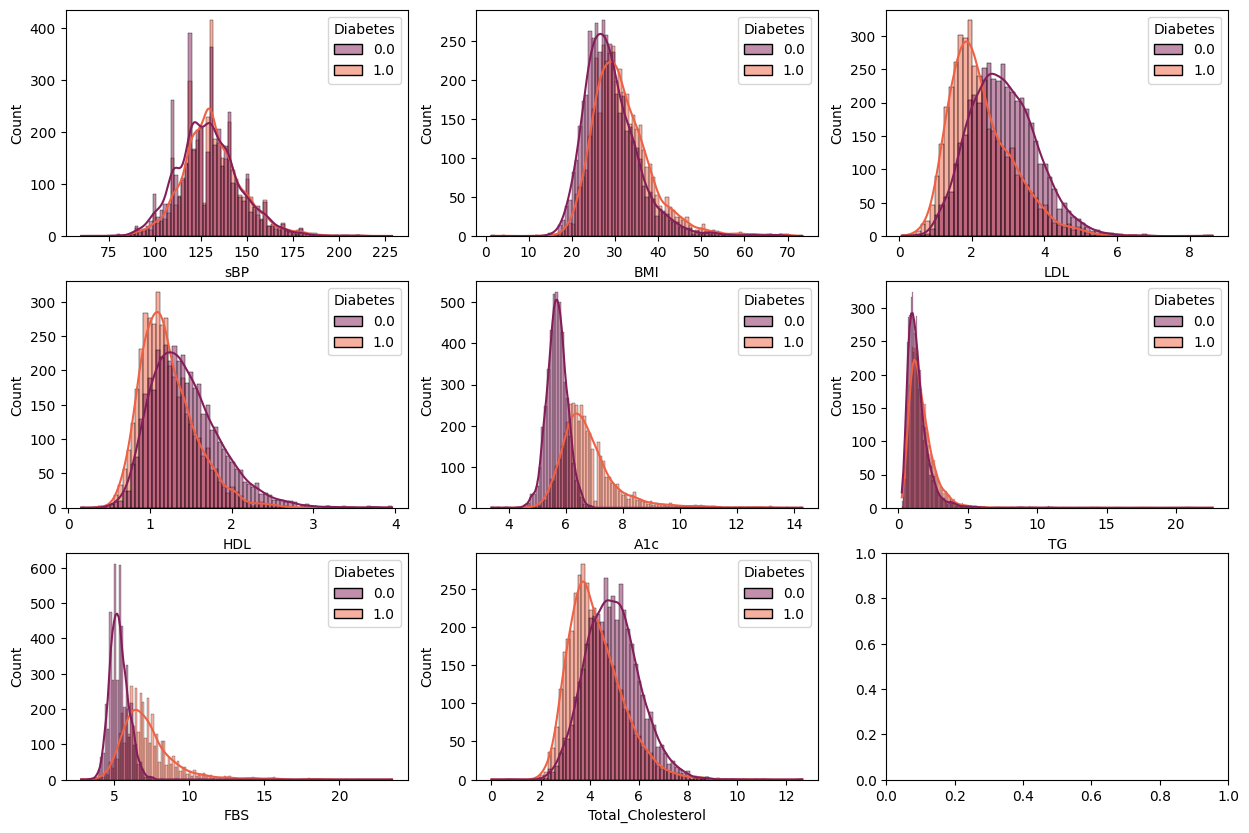

In [ ]:
# checking the difference in distribution of numerical features in two classes

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(df, x=column, hue='Diabetes', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

We can see that LDL, HDL, A1c, FBS and total cholesterol are differnet in the 2 classes

Cross-validation

In [ ]:
# Define utility functions for model evaluation

def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    auc = roc_auc_score(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)

    return conf_matrix, class_report, auc, acc

def print_scores(conf_matrix, class_report, auc, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

Validation
AUC :  0.8028978052126201
Accuracy :  0.8061002178649237
Confusion Matrix:
[[625 104]
 [163 485]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       729
         1.0       0.82      0.75      0.78       648

    accuracy                           0.81      1377
   macro avg       0.81      0.80      0.80      1377
weighted avg       0.81      0.81      0.81      1377

Validation
AUC :  0.8156078182107104
Accuracy :  0.8175872093023255
Confusion Matrix:
[[618 107]
 [144 507]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       725
         1.0       0.83      0.78      0.80       651

    accuracy                           0.82      1376
   macro avg       0.82      0.82      0.82      1376
weighted avg       0.82      0.82      0.82      1376

Validation
AUC :  0.7978915567198708
Accuracy :  0.7979651162790697
Confusion Ma

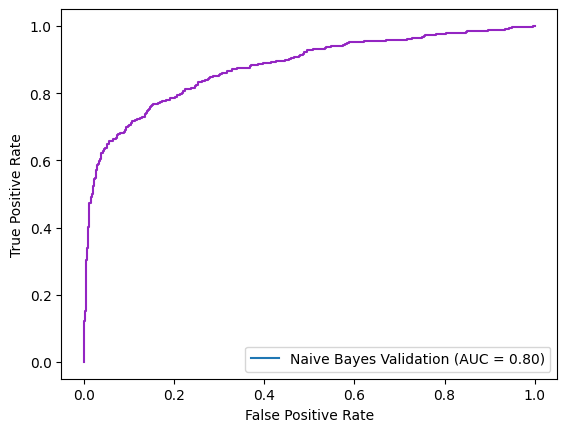

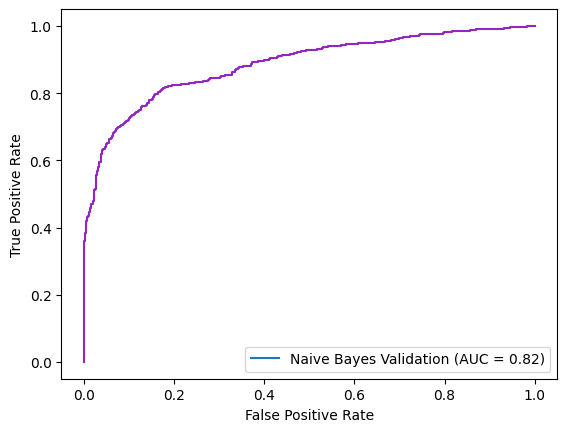

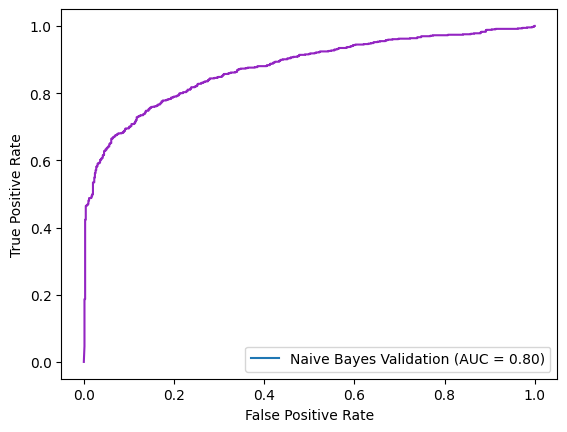

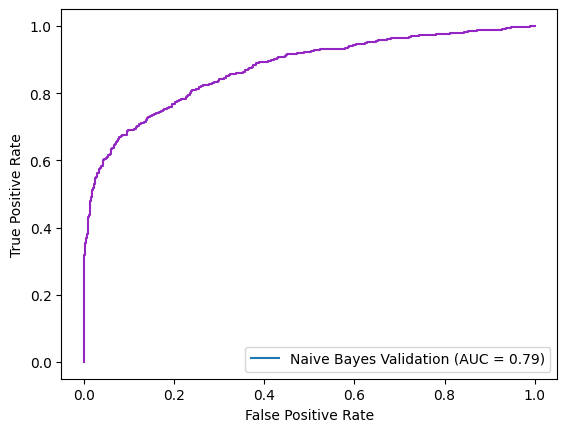

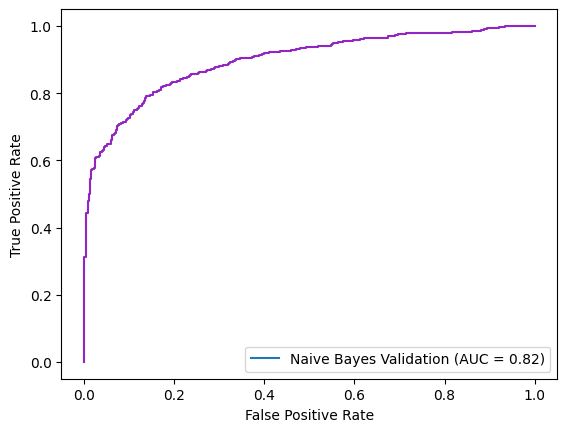

In [ ]:


data_x = df2.drop('Diabetes', axis=1)
data_y = df2['Diabetes']

# 2. Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

# 3. Cross-Validation setup using K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_validation_auc = 0
total_validation_acc = 0

for train_index, valid_index in kf.split(X_train):
    X_train_data, X_valid_data = X_train.iloc[train_index], X_train.iloc[valid_index]
    Y_train_data, Y_valid_data = y_train.iloc[train_index], y_train.iloc[valid_index]

    # 4. Imputation of missing values
    imputer = SimpleImputer(strategy='median')
    X_train_data_imputed = imputer.fit_transform(X_train_data)
    X_valid_data_imputed = imputer.transform(X_valid_data)

    # 5. Normalization of the data
    scaler = StandardScaler()
    X_train_data_normalized = scaler.fit_transform(X_train_data_imputed)
    X_valid_data_normalized = scaler.transform(X_valid_data_imputed)

    # 6. fit the model Gaussian Naive Bayes model ...
    gnb = GaussianNB()
    gnb = gnb.fit(X_train_data_normalized, Y_train_data)

    #7. validaion
    # Predict the target probabilities for the validation set using the extended feature set
    y_hat_prob = gnb.predict_proba(X_valid_data_normalized)
    y_hat = gnb.predict(X_valid_data_normalized)

    # Evaluate model's performance on the validation set
    conf_matrix, class_report, auc, acc = get_scores(Y_valid_data, y_hat)
    print('Validation')
    print_scores(conf_matrix, class_report, auc, acc)
    total_validation_auc += auc
    total_validation_acc += acc

    # Visualize the Receiver Operating Characteristic (ROC) curve for the validation set
    fpr, tpr, thresholds = roc_curve(Y_valid_data, y_hat_prob[:, 1])
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes Validation')
    display.plot()
    ax = plt.gca()
    ax.get_lines()[0].set_color('#9325c2')

Testing

Testing
AUC :  0.8257439677921009
Accuracy :  0.8280069726902963
Confusion Matrix:
[[787 121]
 [175 638]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       908
         1.0       0.84      0.78      0.81       813

    accuracy                           0.83      1721
   macro avg       0.83      0.83      0.83      1721
weighted avg       0.83      0.83      0.83      1721

Validation Set AUC 0.8054371663500657
Validation Set ACC 0.8067142296194965
Testing Set AUC 0.8257439677921009
Testing Set ACC 0.8280069726902963


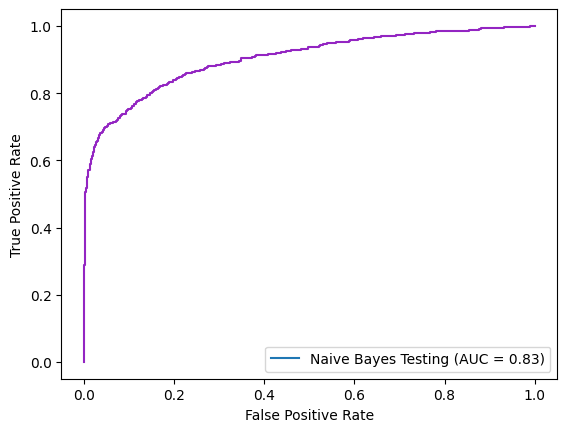

In [ ]:
# Prepare the testing data
X_test_imputed = imputer.transform(X_test)
X_test_normalized = scaler.transform(X_test_imputed)

# Make predictions on the testing data
y_test_prob = gnb.predict_proba(X_test_normalized)
y_test_pred = gnb.predict(X_test_normalized)

# Evaluate the model on the testing data
conf_matrix, class_report, auc, acc = get_scores(y_test, y_test_pred)
print('Testing')
print_scores(conf_matrix, class_report, auc, acc)

# Visualize the ROC curve for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes Testing')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')

total_validation_auc /= k
total_validation_acc /= k


print('Validation Set AUC', total_validation_auc)
print('Validation Set ACC', total_validation_acc)
print('Testing Set AUC', auc)  # Final Testing Set AUC
print('Testing Set ACC', acc)  # Final Testing Set ACC
